In [43]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt           
sns.set(color_codes=True)

In [44]:
df = pd.read_csv('akc-data-latest.csv')
df.dtypes

Unnamed: 0                      object
description                     object
temperament                     object
popularity                      object
min_height                     float64
max_height                     float64
min_weight                     float64
max_weight                     float64
min_expectancy                 float64
max_expectancy                 float64
group                           object
grooming_frequency_value       float64
grooming_frequency_category     object
shedding_value                 float64
shedding_category               object
energy_level_value             float64
energy_level_category           object
trainability_value             float64
trainability_category           object
demeanor_value                 float64
demeanor_category               object
dtype: object

In [51]:
df_short = df.drop(columns = ['description','temperament','grooming_frequency_value','grooming_frequency_category','shedding_value','shedding_category','demeanor_value','demeanor_category','group'])
df_short.rename(columns = {'Unnamed: 0':'Type'})

df_short

,Unnamed: 0,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,energy_level_value,energy_level_category,trainability_value,trainability_category
0,Affenpinscher,148,22.86,29.21,3.175147,4.535924,12.0,15.0,0.6,Regular Exercise,0.8,Easy Training
1,Afghan Hound,113,63.50,68.58,22.679619,27.215542,12.0,15.0,0.8,Energetic,0.2,May be Stubborn
2,Airedale Terrier,60,58.42,58.42,22.679619,31.751466,11.0,14.0,0.6,Regular Exercise,1.0,Eager to Please
3,Akita,47,60.96,71.12,31.751466,58.967008,10.0,13.0,0.8,Energetic,1.0,Eager to Please
4,Alaskan Malamute,58,58.42,63.50,34.019428,38.555351,10.0,14.0,0.8,Energetic,0.4,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,167,54.61,63.50,20.411657,29.483504,12.0,14.0,0.8,Energetic,0.6,Agreeable
273,Working Kelpie,NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,0.8,Energetic,0.4,Independent
274,Xoloitzcuintli,140,25.40,58.42,4.535924,24.947580,13.0,18.0,0.8,Energetic,0.6,Agreeable
275,Yakutian Laika,NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,0.8,Energetic,0.2,May be Stubborn


In [52]:
df_short.rename(columns = {'Unnamed: 0':'Type'})
df_short['max_expectancy'] = df['max_expectancy'].fillna(0).astype(int)
df_short

,Unnamed: 0,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,energy_level_value,energy_level_category,trainability_value,trainability_category
0,Affenpinscher,148,22.86,29.21,3.175147,4.535924,12.0,15,0.6,Regular Exercise,0.8,Easy Training
1,Afghan Hound,113,63.50,68.58,22.679619,27.215542,12.0,15,0.8,Energetic,0.2,May be Stubborn
2,Airedale Terrier,60,58.42,58.42,22.679619,31.751466,11.0,14,0.6,Regular Exercise,1.0,Eager to Please
3,Akita,47,60.96,71.12,31.751466,58.967008,10.0,13,0.8,Energetic,1.0,Eager to Please
4,Alaskan Malamute,58,58.42,63.50,34.019428,38.555351,10.0,14,0.8,Energetic,0.4,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,167,54.61,63.50,20.411657,29.483504,12.0,14,0.8,Energetic,0.6,Agreeable
273,Working Kelpie,NaN,48.26,63.50,12.700586,27.215542,12.0,15,0.8,Energetic,0.4,Independent
274,Xoloitzcuintli,140,25.40,58.42,4.535924,24.947580,13.0,18,0.8,Energetic,0.6,Agreeable
275,Yakutian Laika,NaN,53.34,58.42,18.143695,24.947580,10.0,12,0.8,Energetic,0.2,May be Stubborn


In [53]:
df_max = df_short.groupby(['energy_level_value']).mean()
print(df_max)

                    min_height  max_height  min_weight  max_weight  \
energy_level_value                                                   
0.2                  38.100000   38.100000   18.143695   29.483504   
0.4                  48.661053   57.484211   30.259386   46.934874   
0.6                  40.167517   47.532441   16.227459   24.244128   
0.8                  46.230761   55.962826   16.976954   26.998826   
1.0                  49.870732   58.683293   19.438093   28.410371   

                    min_expectancy  max_expectancy  trainability_value  
energy_level_value                                                      
0.2                      12.000000       13.000000            0.400000  
0.4                      10.944444       12.421053            0.600000  
0.6                      11.384615       13.906780            0.600000  
0.8                      11.304348       13.706522            0.629885  
1.0                      11.250000       13.512195            0.682051 

Text(0.5, 1.0, 'Average Max Expectancy')

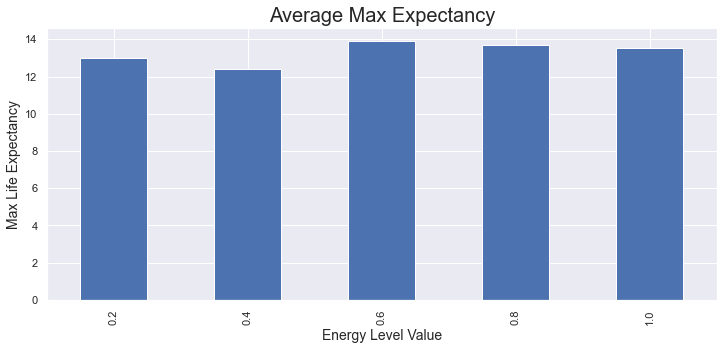

In [54]:
df_max['max_expectancy'].plot(kind = 'bar', figsize = (12,5))
plt.xlabel('Energy Level Value', fontsize = 14)
plt.ylabel('Max Life Expectancy', fontsize = 14)
plt.title('Average Max Expectancy', fontsize = 20)

Text(0.5, 1.0, 'Average Max Expectancy')

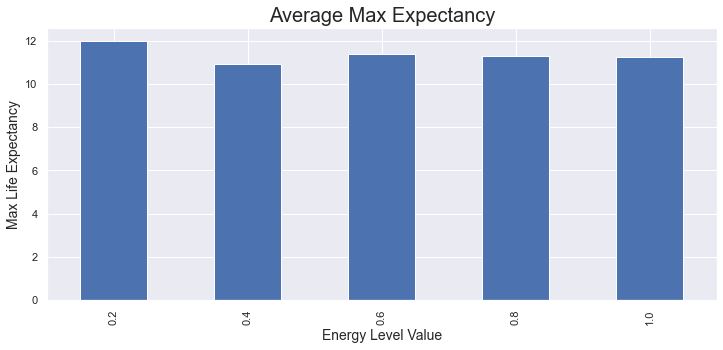

In [98]:
df_max['min_expectancy'].plot(kind = 'bar', figsize = (12,5))
plt.xlabel('Energy Level Value', fontsize = 14)
plt.ylabel('Max Life Expectancy', fontsize = 14)
plt.title('Average Max Expectancy', fontsize = 20)

Text(0.5, 1.0, 'Average Max Expectancy')

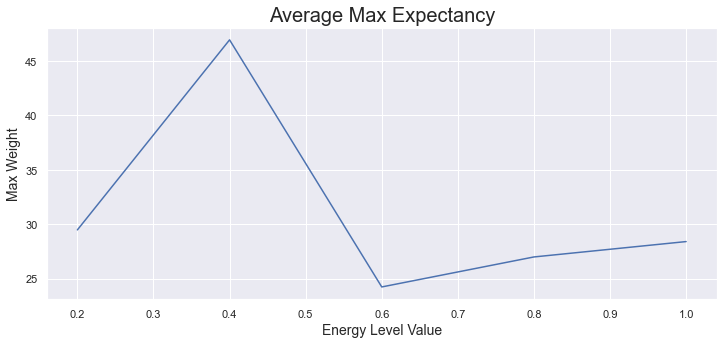

In [55]:
df_max['max_weight'].plot(kind = 'line', figsize = (12,5))
plt.xlabel('Energy Level Value', fontsize = 14)
plt.ylabel('Max Weight', fontsize = 14)
plt.title('Average Max Expectancy', fontsize = 20)

In [83]:
df_short.rank().head()
df_short['Rank_By_Popularity'] = df_short['popularity'].rank(ascending=False)
df_short.head()



,Unnamed: 0,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,energy_level_value,energy_level_category,trainability_value,trainability_category,Rank By Popularity,Rank_By_Popularity
0,Affenpinscher,148,22.86,29.21,3.175147,4.535924,12.0,15,0.6,Regular Exercise,0.8,Easy Training,143.0,143.0
1,Afghan Hound,113,63.50,68.58,22.679619,27.215542,12.0,15,0.8,Energetic,0.2,May be Stubborn,182.0,182.0
2,Airedale Terrier,60,58.42,58.42,22.679619,31.751466,11.0,14,0.6,Regular Exercise,1.0,Eager to Please,48.0,48.0
3,Akita,47,60.96,71.12,31.751466,58.967008,10.0,13,0.8,Energetic,1.0,Eager to Please,63.0,63.0
4,Alaskan Malamute,58,58.42,63.50,34.019428,38.555351,10.0,14,0.8,Energetic,0.4,Independent,51.0,51.0


In [84]:
df_train = df_short[['Unnamed: 0','Rank_By_Popularity','trainability_value']]
df_train = df_train.dropna()
df_train = df_train.sort_values(by = 'Rank_By_Popularity',ascending = True)
df_train.head(20)


,Unnamed: 0,Rank_By_Popularity,trainability_value
21,Barbet,2.0,0.6
20,Azawakh,2.0,0.4
154,Lagotto Romagnolo,4.0,1.0
59,Brussels Griffon,5.0,0.6
177,Norwegian Elkhound,6.0,0.6
256,Tibetan Terrier,7.0,0.4
147,Keeshond,8.0,0.8
100,English Setter,9.0,0.8
158,Leonberger,10.0,1.0
185,Pekingese,11.0,0.2


Text(0.5, 1.0, 'Popularity and Trainability')

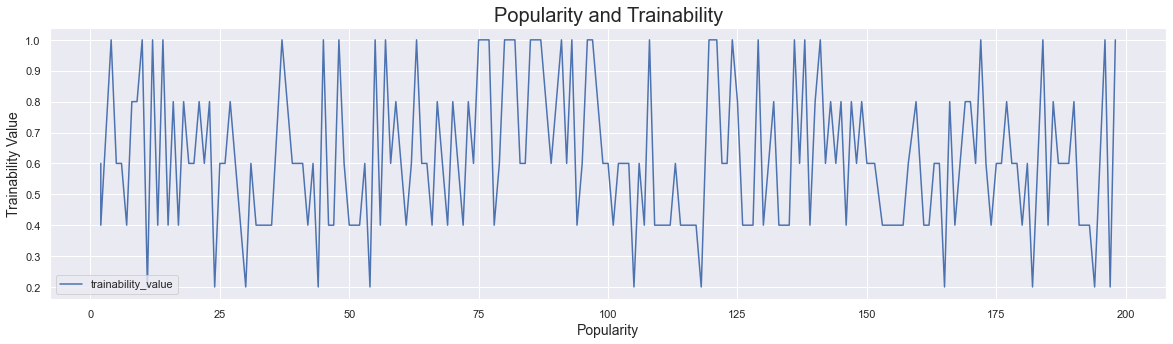

In [97]:
df_train.plot(x = 'Rank_By_Popularity' , y = 'trainability_value', kind = 'line', figsize = (20,5))
plt.xlabel('Popularity', fontsize = 14)
plt.ylabel('Trainability Value', fontsize = 14)
plt.title('Popularity and Trainability', fontsize = 20)